In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [4]:
digits = load_digits()
X = digits.data          # Flattened images (n_samples, n_features)
y = digits.target

print("Original shape:", X.shape)


Original shape: (1797, 64)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
lr_original = LogisticRegression(max_iter=5000)
lr_original.fit(X_train_scaled, y_train)
y_pred_original = lr_original.predict(X_test_scaled)

original_accuracy = accuracy_score(y_test, y_pred_original)

print("\nAccuracy without PCA:", original_accuracy)



Accuracy without PCA: 0.9711111111111111


In [13]:
components = [2, 10, 30, 50]
accuracies = []

for n in components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    lr = LogisticRegression(max_iter=5000)
    lr.fit(X_train_pca, y_train)

    y_pred = lr.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"Accuracy with PCA ({n} components): {acc}")
    print(f"Explained Variance Ratio Sum ({n}): {np.sum(pca.explained_variance_ratio_):.4f}\n")

Accuracy with PCA (2 components): 0.5066666666666667
Explained Variance Ratio Sum (2): 0.2182

Accuracy with PCA (10 components): 0.8888888888888888
Explained Variance Ratio Sum (10): 0.5935

Accuracy with PCA (30 components): 0.9666666666666667
Explained Variance Ratio Sum (30): 0.8958

Accuracy with PCA (50 components): 0.9711111111111111
Explained Variance Ratio Sum (50): 0.9834



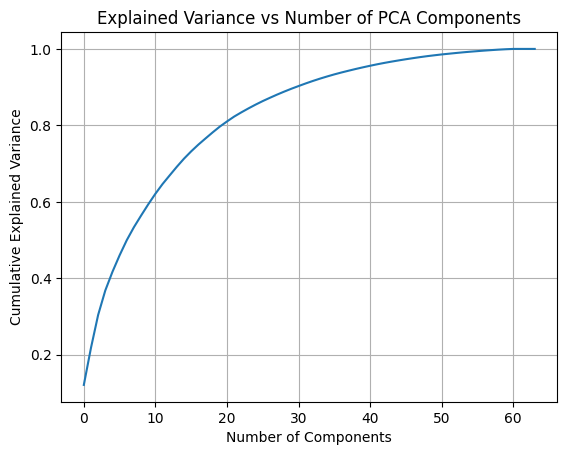

In [15]:
pca_full = PCA().fit(X_train_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure()
plt.plot(cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of PCA Components")
plt.grid(True)
plt.show()

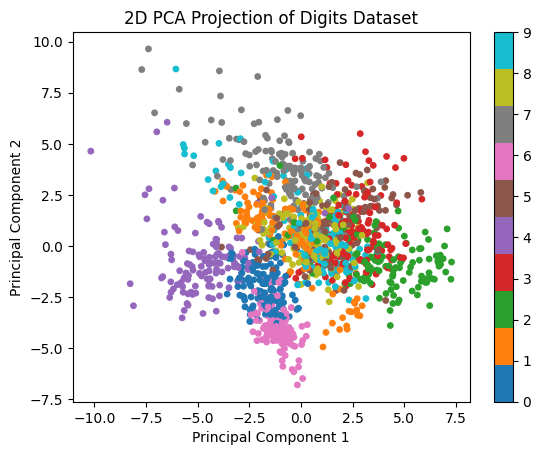

In [17]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train_scaled)

plt.figure()
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_train, cmap="tab10", s=15)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection of Digits Dataset")
plt.colorbar(scatter)
plt.show()